In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IDEA: hacer un grafico de lineas, y mostrar como fue variando el alquiler
#de bicicletas a traves de 2013,2014 y 2015

In [2]:
station = pd.read_csv('tp_bike/station.csv')

In [3]:
station.head(2)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013


In [4]:
station.groupby('id').count().tail(5)

,name,lat,long,dock_count,city,installation_date
id,,,,,,
77,1,1,1,1,1,1
80,1,1,1,1,1,1
82,1,1,1,1,1,1
83,1,1,1,1,1,1
84,1,1,1,1,1,1


In [5]:
trip = pd.read_csv('tp_bike/trip.csv')

In [6]:
#se puede refactorizar este metodo? lo hize de una manera muy chota
trip.loc[:,:].sort_values('start_station_id', ascending = True)\
             .groupby('start_station_id').count().head(10)
#aca tengo la cantidad de veces, que se salieron de cada estacion    

,id,duration,start_date,start_station_name,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
start_station_id,,,,,,,,,,
2,9558,9558,9558,9558,9558,9558,9558,9558,9558,9526
3,1594,1594,1594,1594,1594,1594,1594,1594,1594,1547
4,3861,3861,3861,3861,3861,3861,3861,3861,3861,3833
5,1257,1257,1257,1257,1257,1257,1257,1257,1257,1249
6,2917,2917,2917,2917,2917,2917,2917,2917,2917,2895
7,2233,2233,2233,2233,2233,2233,2233,2233,2233,2213
8,1692,1692,1692,1692,1692,1692,1692,1692,1692,1679
9,1910,1910,1910,1910,1910,1910,1910,1910,1910,1892
10,2393,2393,2393,2393,2393,2393,2393,2393,2393,2377


In [7]:

trip.loc[:,:].sort_values('end_station_id', ascending = True)\
             .groupby('end_station_id').count().head(10)
#aca tengo cuantas veces se llego a cada estacion    

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,bike_id,subscription_type,zip_code
end_station_id,,,,,,,,,,
2,9415,9415,9415,9415,9415,9415,9415,9415,9415,9382
3,1786,1786,1786,1786,1786,1786,1786,1786,1786,1734
4,3705,3705,3705,3705,3705,3705,3705,3705,3705,3686
5,1169,1169,1169,1169,1169,1169,1169,1169,1169,1159
6,3163,3163,3163,3163,3163,3163,3163,3163,3163,3135
7,2498,2498,2498,2498,2498,2498,2498,2498,2498,2484
8,1707,1707,1707,1707,1707,1707,1707,1707,1707,1693
9,2200,2200,2200,2200,2200,2200,2200,2200,2200,2181
10,1658,1658,1658,1658,1658,1658,1658,1658,1658,1639


In [8]:
#1 conclusion (tal vez trivial) se usan las 70 estaciones, tanto para la
#llegada como para la salida
#Pregunta: se puede salir y llegar a una misma estacion? la logica indicaria
#que si, entonces cuantos viajes con esta particularidad existen?
trip.info()
#ojo que en el zip hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [9]:
#IDEA: Quiero saber la estacion mas usadad de cada ciudad
#idem pero con las estaciones de llegada
#idem con la de partida
#hacer visus, bart chart apilado: eje x cada año, cada barra tiene 10 colores
#o menos
trip.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [10]:
#Dame las 10 estaciones que mas veces se usaron como partida
trip['quantity_start_station_per_id'] = 1
trip.head(2)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,quantity_start_station_per_id
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,1
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,1


In [11]:
trip.rename(columns = {'cantidad_start_station_id': 'quantity_start_station_per_id'}, inplace = True)

In [12]:
trip.dtypes

id                                int64
duration                          int64
start_date                       object
start_station_name               object
start_station_id                  int64
end_date                         object
end_station_name                 object
end_station_id                    int64
bike_id                           int64
subscription_type                object
zip_code                         object
quantity_start_station_per_id     int64
dtype: object

In [13]:
#Las 10 estaciones de salida mas usadas 
grupo = trip.groupby('start_station_id').agg('count')\
            .sort_values('id', ascending = False)
topEstacionesSalida = grupo.loc[:,['id']].head(10)
topEstacionesSalida

,id
start_station_id,
70,49092
69,33742
50,32934
60,27713
55,26089
61,25837
74,24838
77,24172
65,23724


In [14]:
#idem con las estaciones de llegada
grupo = trip.groupby('end_station_id').agg('count')\
            .sort_values('id', ascending = False)
topEstacionesLlegada = grupo.loc[:,['id']].head(10)
topEstacionesLlegada

,id
end_station_id,
70,63179
69,35117
50,33193
60,30796
61,28529
77,28033
65,26637
74,25025
55,23080


In [15]:
#analizar los cuadros, para el informe claramente las 4 primeras estaciones 
#son las que mas se usan
#IMPORTANTE: ME GUSTARIA TENER EL NOMBRE DE CADA ESTACION, COMO LO HAGO?

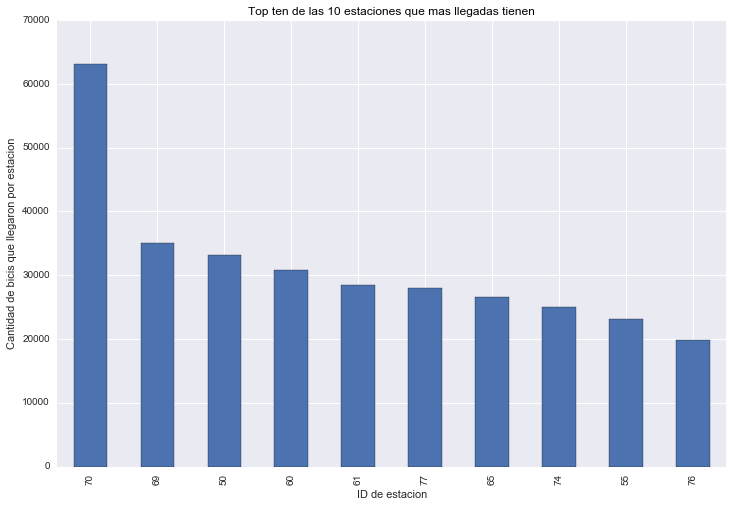

In [16]:
#Plots
plt.title('Top ten de las 10 estaciones que mas llegadas tienen', color = 'Black')
topEstacionesLlegada['id']\
    .plot(kind = 'bar', figsize = (12,8));
plt.xlabel('ID de estacion')  #QUIERO QUE APAREZCA EL ID EN EL EJE X
plt.ylabel('Cantidad de bicis que llegaron por estacion')
#LO IDEAL SERIA QUE EN EL EJE X ESTE EL NOMBRE DE LA ESTACION ---> Listo

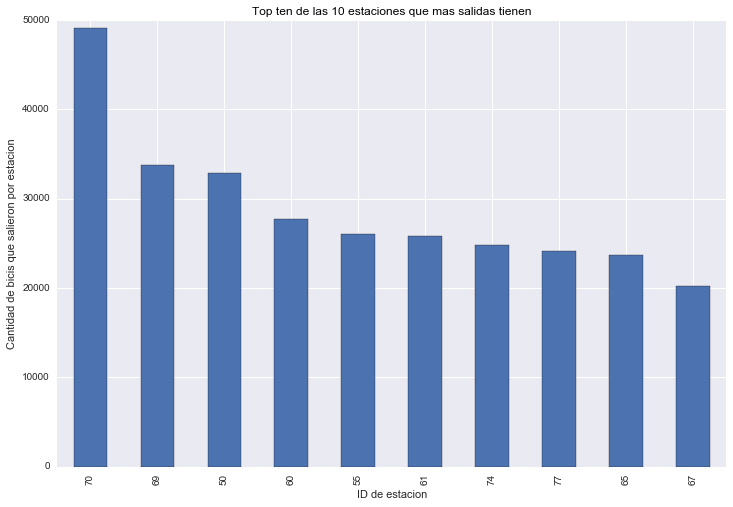

In [17]:
plt.title('Top ten de las 10 estaciones que mas salidas tienen', color = 'Black')
topEstacionesSalida['id']\
    .plot(kind = 'bar', figsize = (12,8));
plt.xlabel('ID de estacion')  #QUIERO QUE APAREZCA EL ID EN EL EJE X
plt.ylabel('Cantidad de bicis que salieron por estacion')

# Alquileres por año, meses y demas datos

In [18]:
#Separo
fechaYHora  = trip['start_date'].str.split(' ')
fecha = fechaYHora.map(lambda x:x[0])
hora = fechaYHora.map(lambda x: x[1])

In [19]:
trip = trip.assign(fecha = fecha,hora = hora)

In [20]:
del trip['start_date']

In [21]:
trip.head(5)

,id,duration,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,quantity_start_station_per_id,fecha,hora
0,4576,63,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,1,8/29/2013,14:13
1,4607,70,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,1,8/29/2013,14:42
2,4130,71,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,1,8/29/2013,10:16
3,4251,77,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,1,8/29/2013,11:29
4,4299,83,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,1,8/29/2013,12:02


In [22]:
diasMesesAnios = trip['fecha'].str.split('/')
dias = diasMesesAnios.map(lambda x: x[1])
meses = diasMesesAnios.map(lambda x: x[0])
anios = diasMesesAnios.map(lambda x: x[2])
aniosYMeses = diasMesesAnios.map(lambda x: str(x[0]) + '/' + str(x[2]))

In [23]:
fechas = trip.assign(dia = dias, mes = meses, anio = anios,aniosYMeses = aniosYMeses)

In [24]:
fechas = fechas.loc[:,['subscription_type','dia','mes','anio','aniosYMeses']]

In [25]:
fechas = fechas.sort_values(['dia','mes','anio'])
fechas

,subscription_type,dia,mes,anio,aniosYMeses
100563,Subscriber,1,1,2014,1/2014
100564,Subscriber,1,1,2014,1/2014
100565,Subscriber,1,1,2014,1/2014
100566,Customer,1,1,2014,1/2014
100567,Customer,1,1,2014,1/2014
100568,Customer,1,1,2014,1/2014
100569,Customer,1,1,2014,1/2014
100570,Customer,1,1,2014,1/2014
100571,Customer,1,1,2014,1/2014
100572,Customer,1,1,2014,1/2014


In [26]:
cantidadPorAnio = fechas['anio'].value_counts().sort_index()
cantidadPorAnio

2013    100563
2014    326339
2015    243057
Name: anio, dtype: int64

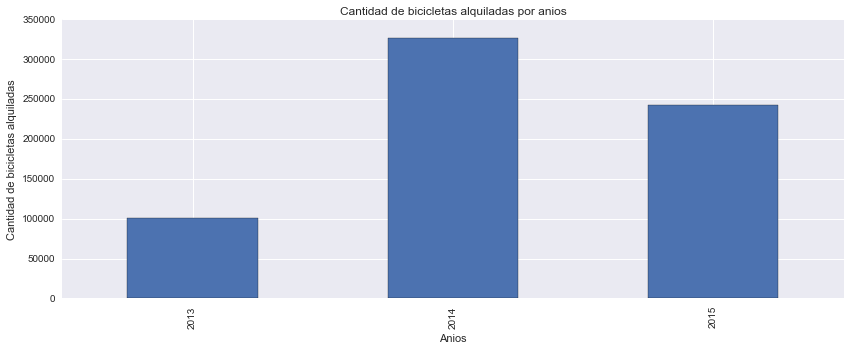

In [27]:
plt.figure()
plt.title('Cantidad de bicicletas alquiladas por anios')
cantidadPorAnio.plot('bar',figsize=(14,5))
plt.xlabel('Anios')
plt.ylabel('Cantidad de bicicletas alquiladas')